In [2]:
import pandas as pd

dataset = pd.read_csv('snow_obj.csv', delimiter='\t')
dataset.head()

,size,roughness,color,motion,label
0,50.959361,1.318226,green,0.054290,tree
1,60.008521,0.554291,brown,0.000000,tree
2,20.530772,1.097752,white,1.380464,tree
3,28.092138,0.966482,grey,0.650528,tree
4,48.344211,0.799093,grey,0.000000,tree


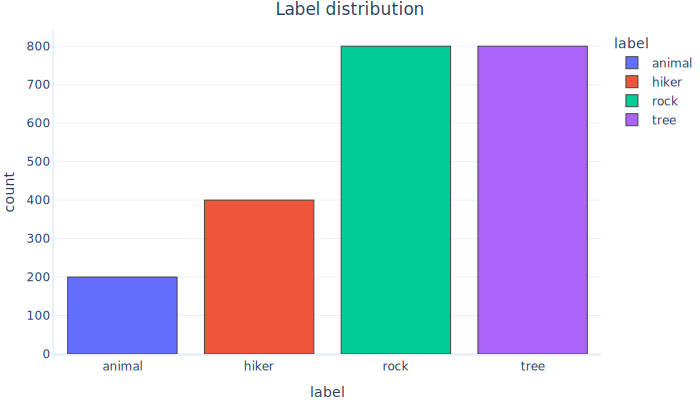

In [4]:
import graphing as gr
import plotly.io as pio
pio.renderers.default = "svg"

gr.multiple_histogram(dataset, label_x="label", label_group="label", title="Label distribution")

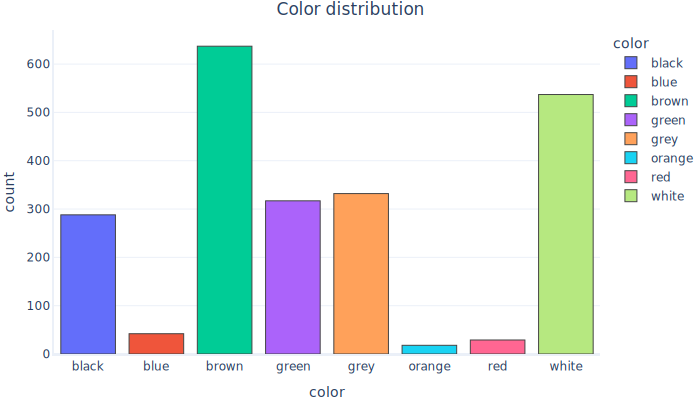

In [5]:
gr.multiple_histogram(dataset, label_x="color", label_group="color", title="Color distribution")

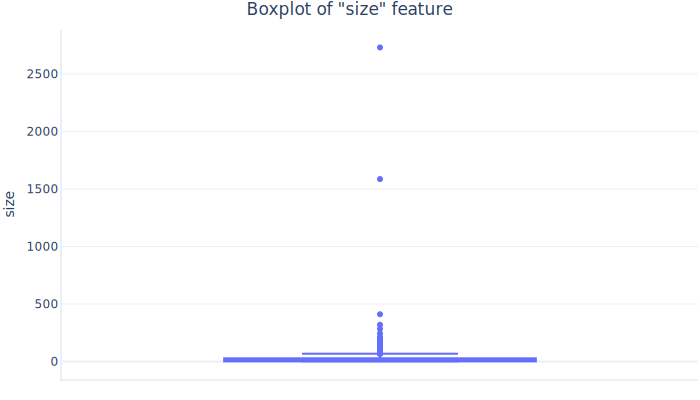

In [6]:
gr.box_and_whisker(dataset, label_y="size", title='Boxplot of "size" feature')

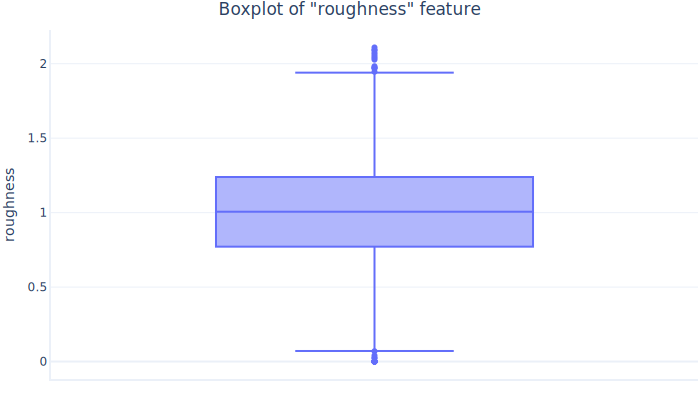

In [7]:
gr.box_and_whisker(dataset, label_y="roughness", title='Boxplot of "roughness" feature')

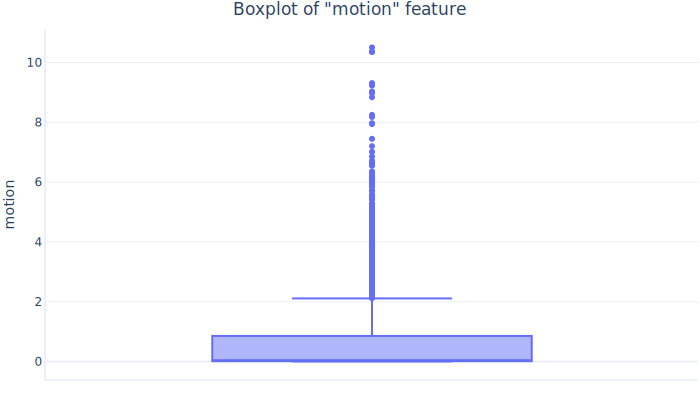

In [8]:
gr.box_and_whisker(dataset, label_y="motion", title='Boxplot of "motion" feature')

From the data above one could assume that the smaller and faster objects are likely hikers and animals, whereas the bigger, more static elements are trees and rocks.

#### Building a classification model

Let's build and train a classification model using a random forest, to predict the class of an object based on the features in our dataset:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(1540, 5)
(660, 5)


In [10]:
model = RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

features = ['size', 'roughness', 'motion']

model.fit(train[features], train['label'])

RandomForestClassifier(n_estimators=1, random_state=1, verbose=False)

## Assessing our model

We can now use our newly trained model to make predictions using the *test* set.

By comparing the values predicted to the actual labels (also called *true* values), we can measure the model's performance using different *metrics*.

*Accuracy*, for example, is the simply number of correctly predicted labels out of all predictions performed:

```sh
    Accuracy = Correct Predictions / Total Predictions
```

Let's see how this can be done in code:

In [12]:
from sklearn.metrics import accuracy_score

actual = test['label']
predictions = model.predict(test[features])

accuracy = accuracy_score(actual, predictions)

# Return accuracy as a number of correct predictions
acc_norm = accuracy_score(actual, predictions, normalize=False)

print(f"The random forest model's accuracy on the test set is {accuracy:.4f}.")
print(f"It correctly predicted {acc_norm} labels in {len(test.label)} predictions.")

The random forest model's accuracy on the test set is 0.8924.
It correctly predicted 589 labels in 660 predictions.


Our model __seems__ to be doing quite well!

That intuition, however, can be misleading:

- Accuracy does not take into account the __wrong__ predictions made by the model

- It's also not very good at painting a clear picture in *class-imbalanced datasets*, like ours, where the number of possible classes is not evenly distributed (recall that we have 800 trees, 800 rocks, but only 200 animals)

## Building a confusion matrix

A *confusion matrix* is a table where we compare the actual labels to what the model predicted. It gives us a more detailed understanding of how the model is doing and where it's getting things right or missing.

This is one of the ways we can do that in code:

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(actual, predictions, normalize=None)

print(cm)

[[ 28  38   0   0]
 [ 30 103   1   0]
 [  0   1 217   1]
 [  0   0   0 241]]


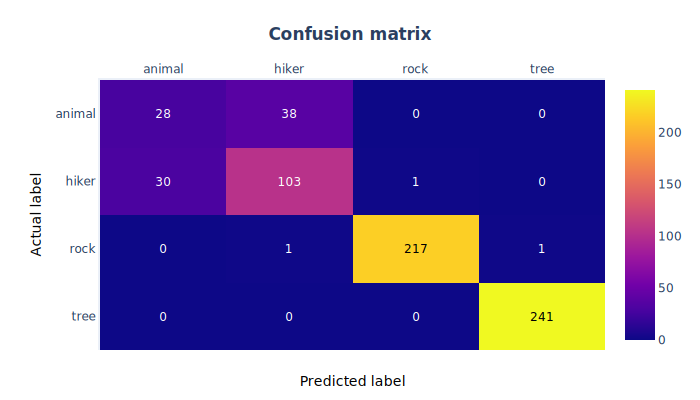

In [16]:
# We use plotly to create plots and charts
import plotly.figure_factory as ff

# Create the list of unique labels in the test set, to use in our plot
# I.e., ['animal', 'hiker', 'rock', 'tree']
x = y = sorted(list(test["label"].unique()))

# Plot the matrix above as a heatmap with annotations (values) in its cells
fig = ff.create_annotated_heatmap(cm, x, y)

# Set titles and ordering
fig.update_layout(  title_text="<b>Confusion matrix</b>", 
                    yaxis = dict(categoryorder = "category descending"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted label",
                        xref="paper",
                        yref="paper"))

fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.15,
                        y=0.5,
                        showarrow=False,
                        text="Actual label",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# We need margins so the titles fit
fig.update_layout(margin=dict(t=80, r=20, l=100, b=50))
fig['data'][0]['showscale'] = True
fig.show()